In [1]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d phylake1337/fire-dataset

In [ ]:
!unzip -o -q fire-dataset.zip -d fire_dataset

In [ ]:
!ls fire_dataset
!ls fire_dataset/fire_dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install kagglehub




In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("phylake1337/fire-dataset")

print("Path to dataset files:", path)

In [ ]:
data_dir = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"

!ls /root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)


In [ ]:
import os

base = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"
os.rename(os.path.join(base, "fire_images"), os.path.join(base, "Fire"))
os.rename(os.path.join(base, "non_fire_images"), os.path.join(base, "Non_Fire"))

!ls "$base"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output: Fire / Non-Fire
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


In [ ]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


In [ ]:
model.summary()



In [ ]:
import os

inner_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"
print("📁 Subfolders inside fire_dataset:")
print(os.listdir(inner_path))




In [ ]:
import os, random
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# ✅ Correct paths
fire_dir = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/Fire"
non_fire_dir = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/Non_Fire"

# Randomly choose between fire and non-fire folder
choice = random.choice(["fire", "non_fire"])
if choice == "fire":
    img_path = os.path.join(fire_dir, random.choice(os.listdir(fire_dir)))
else:
    img_path = os.path.join(non_fire_dir, random.choice(os.listdir(non_fire_dir)))

print(f"🔥 Randomly chosen image from: {choice.upper()} folder")
print(f"📍 Path: {img_path}")

# Load and display the image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)
plt.axis("off")
plt.title(f"Random {choice.upper()} Image")
plt.show()


In [ ]:
# 🔥 Prediction + Visualization Code

# Load and preprocess image (already chosen as img_path)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalize just like during training

# Predict
prediction = model.predict(img_array)
prob_fire = float(prediction[0][0])

# Determine label
if prob_fire > 0.5:
    label = "🔥 Fire Detected"
else:
    label = "🟩 Non-Fire"

# Display result
plt.imshow(img)
plt.axis("off")
plt.title(f"{label} (Probability of Fire: {prob_fire:.4f})")
plt.show()


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}📁 {os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:3]:  # show first 3 images only
        print(f"{subindent}🖼️ {f}")



In [ ]:
import os

# Search entire file system for 'fire'
for root, dirs, files in os.walk("/"):
    for d in dirs:
        if "fire" in d.lower():
            print("📁 Folder:", os.path.join(root, d))




In [ ]:
from kagglehub import dataset_download
import os

# Download the dataset again
path = dataset_download("phylake1337/fire-dataset")

print("✅ Dataset downloaded to:", path)
print("📂 Contents:", os.listdir(path))



In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"
print("📁 Subfolders inside fire_dataset:", os.listdir(dataset_path))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"

# Create training & validation data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

print("✅ Class indices:", train_gen.class_indices)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


In [ ]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Pick a random image from Fire or Non_Fire folder
choice = random.choice(['fire_images', 'non_fire_images'])
img_dir = f"/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/{choice}"
img_path = os.path.join(img_dir, random.choice(os.listdir(img_dir)))

# Load and predict
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

plt.imshow(img)
plt.axis('off')
plt.title("🔥 Fire Detected!" if prediction > 0.5 else "🌿 No Fire Detected")
plt.show()

print(f"Prediction value: {prediction:.4f}")
print(f"Actual folder: {choice}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os, random

# ================================
# 🔹 1. Dataset Paths
# ================================
base_dir = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset"
train_dir = base_dir  # since dataset has Fire/Non_Fire folders

print("✅ Dataset structure:", os.listdir(base_dir))

# ================================
# 🔹 2. Data Generators
# ================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,        # 80-20 split
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    classes=['non_fire_images', 'fire_images']  # Force correct order
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    classes=['non_fire_images', 'fire_images']
)

print("✅ Class indices:", train_gen.class_indices)

# ================================
# 🔹 3. Model Architecture
# ================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ================================
# 🔹 4. Training with Early Stopping
# ================================
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_fire_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint]
)

# ================================
# 🔹 5. Accuracy and Loss Curves
# ================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# ================================
# 🔹 6. Random Test Prediction
# ================================
choice = random.choice(['fire_images', 'non_fire_images'])
folder_path = os.path.join(base_dir, choice)
img_path = os.path.join(folder_path, random.choice(os.listdir(folder_path)))

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]
label = "🔥 Fire Detected" if pred > 0.5 else "🌿 No Fire Detected"

plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
plt.title(f"{label}  |  Confidence: {pred:.3f}")
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Create project folder
!mkdir -p /content/drive/MyDrive/wildfire_project


Mounted at /content/drive


In [ ]:
# ================================
# 🔹 Manual Image Selection
# ================================
# Choose 'fire_images' or 'non_fire_images' explicitly
chosen_class = 'fire_images'   # 🔥 change to 'fire_images' if you want fire image
folder_path = os.path.join(base_dir, chosen_class)

# Pick a random image from that folder
img_name = random.choice(os.listdir(folder_path))
img_path = os.path.join(folder_path, img_name)

print(f"🖼️ Showing {chosen_class.upper()} image: {img_name}")

# Load and preprocess
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)[0][0]
label = "🔥 Fire Detected" if pred > 0.5 else "🌿 No Fire Detected"

# Display result
plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
plt.title(f"{label}\nConfidence: {pred:.3f}")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === CONFIG ===
last_conv_layer_name = "conv2d_8"  # based on your layer list
img_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/non_fire_images/non_fire.195.png"  # example image path

# === Load and preprocess image ===
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# === Get prediction ===
preds = model.predict(img_array)
predicted_class = np.argmax(preds[0])
print(f"Predicted class: {predicted_class}, Confidence: {preds[0][predicted_class]:.4f}")

# === Build Grad-CAM model ===
grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer(last_conv_layer_name).output, model.output]
)

# === Compute gradients ===
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, predicted_class]

grads = tape.gradient(loss, conv_outputs)

# === Pool gradients ===
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

# === Normalize heatmap ===
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# === Display Grad-CAM ===
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
heatmap = cv2.resize(heatmap.numpy(), (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Overlay")
plt.show()



In [ ]:
model.input_shape


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load and preprocess image
img_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/non_fire_images/non_fire.195.png"
img_size = (128, 128)  # ✅ match model.input_shape
img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Get prediction
preds = model.predict(img_array)
pred_class = np.argmax(preds[0])
confidence = preds[0][pred_class]
class_labels = ['Fire', 'Non-Fire']
print(f"Prediction: {class_labels[pred_class]} | Confidence: {confidence:.3f}")

# Grad-CAM setup
last_conv_layer_name = "conv2d_8"  # ✅ from your layer list
grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer(last_conv_layer_name).output, model.output]
)

# Compute gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, pred_class]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]

# Apply weights and generate heatmap
heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
heatmap = cv2.resize(heatmap.numpy(), img_size)

# Overlay Grad-CAM heatmap on image
img = cv2.imread(img_path)
img = cv2.resize(img, img_size)
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Prediction: {class_labels[pred_class]} ({confidence:.2f})")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, getattr(layer, 'input_shape', 'no input yet'), getattr(layer, 'output_shape', 'no output yet'))


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

img_path = "/root/.cache/kagglehub/datasets/phylake1337/fire-dataset/versions/1/fire_dataset/non_fire_images/non_fire.195.png"
img_size = (128, 128)

# Preprocess image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
preds = model.predict(img_array)
confidence = preds[0][0]
pred_class = 0 if confidence > 0.5 else 1
class_labels = ['Fire', 'Non-Fire']
print(f"Prediction: {class_labels[pred_class]} | Confidence: {confidence:.3f}")

# Find last conv layer
print("\nAvailable Conv2D layers:")
for layer in model.layers:
    if 'conv' in layer.name:
        print(f"  - {layer.name}")

last_conv_layer_name = "conv2d_8"  # Change this based on output above

# Grad-CAM model
grad_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=[model.get_layer(last_conv_layer_name).output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]

heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
heatmap = np.maximum(heatmap, 0)
if np.max(heatmap) != 0:
    heatmap = heatmap / np.max(heatmap)
heatmap = cv2.resize(heatmap.numpy(), img_size)

# Overlay
img_display = cv2.imread(img_path)
img_display = cv2.resize(img_display, img_size)
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img_display, 0.6, heatmap_colored, 0.4, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Prediction: {class_labels[pred_class]} ({confidence:.2f})")
plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!ls /content/fire_dataset/non_fire_images/ | head -5

In [ ]:
!pwd
!ls -la

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Create project folder
!mkdir -p /content/drive/MyDrive/wildfire_project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazimmuhammed","key":"dfbcb50474a7daab85e2deccaa4f2f73"}'}

In [ ]:
# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download to Google Drive
!kaggle datasets download -d phylake1337/fire-dataset -p /content/drive/MyDrive/wildfire_project/

# Unzip in Drive
!unzip -o -q /content/drive/MyDrive/wildfire_project/fire-dataset.zip -d /content/drive/MyDrive/wildfire_project/

# Verify it's there
!ls /content/drive/MyDrive/wildfire_project/

Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
 95% 369M/387M [00:01<00:00, 244MB/s]
100% 387M/387M [00:02<00:00, 180MB/s]
fire_dataset  fire-dataset.zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Set dataset path (now in Drive!)
data_dir = "/content/drive/MyDrive/wildfire_project/fire_dataset"

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [ ]:
# Build CNN model
model = Sequential([
    # First Conv Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    # Second Conv Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Conv Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

print("\n✅ Training complete!")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 436ms/step - accuracy: 0.7968 - loss: 0.4081 - val_accuracy: 0.9045 - val_loss: 0.2425
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - accuracy: 0.9488 - loss: 0.1284 - val_accuracy: 0.9246 - val_loss: 0.1930
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.9561 - loss: 0.1210 - val_accuracy: 0.9045 - val_loss: 0.1949
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.9564 - loss: 0.1224 - val_accuracy: 0.9497 - val_loss: 0.1326
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 408ms/step - accuracy: 0.9743 - loss: 0.0872 - val_accuracy: 0.9447 - val_loss: 0.1301
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 378ms/step - accuracy: 0.9694 - loss: 0.0765 - val_accuracy: 0.9347 - val_loss: 0.1425
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 399ms/step - accuracy: 0.9437 - loss: 0.1544 - val_accuracy: 0.9347 - val_loss: 0.2583
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - accuracy: 0.9494 - loss: 0.1304 - val_accu

In [ ]:
# Save model to Drive
model.save('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')
print("✅ Model saved to Google Drive!")

# Also save training history
import pickle
with open('/content/drive/MyDrive/wildfire_project/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
print("✅ Training history saved!")

✅ Model saved to Google Drive!
✅ Training history saved!


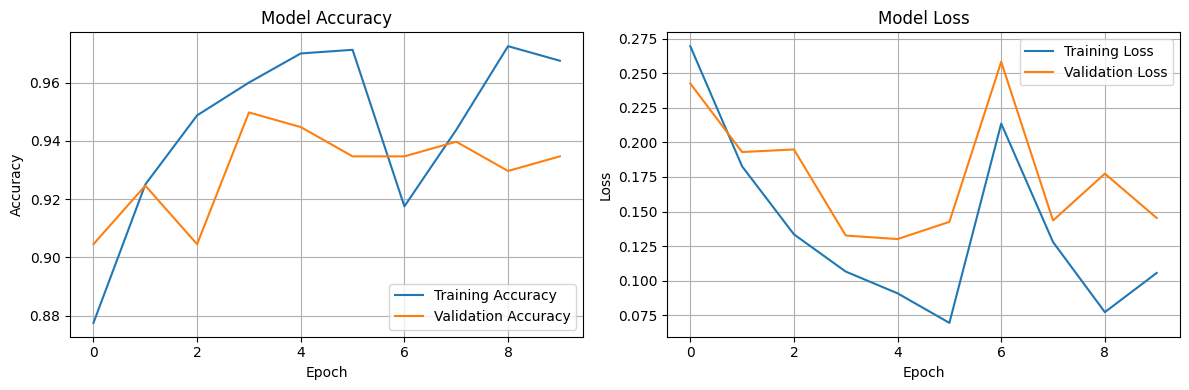

✅ Plots saved to Drive!


In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/wildfire_project/training_plots.png')
plt.show()
print("✅ Plots saved to Drive!")

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Get a sample fire image
fire_img_path = "/content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.1.png"
img_size = (128, 128)

# Load and preprocess
img = tf.keras.preprocessing.image.load_img(fire_img_path, target_size=img_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array_normalized = np.expand_dims(img_array, axis=0) / 255.0

# Convert to tensor
img_tensor = tf.convert_to_tensor(img_array_normalized)

# Compute saliency map
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    predictions = model(img_tensor)

gradients = tape.gradient(predictions, img_tensor)
gradients = tf.abs(gradients)
saliency = tf.reduce_max(gradients, axis=-1)[0]

# Predict
preds = model.predict(img_array_normalized)
confidence = preds[0][0]
pred_class = "Fire" if confidence > 0.5 else "Non-Fire"

# Visualize
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Saliency Map (What model focuses on)")
plt.imshow(saliency, cmap='hot')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(img)
plt.imshow(saliency, cmap='hot', alpha=0.5)
plt.axis('off')

plt.suptitle(f"Prediction: {pred_class} | Confidence: {confidence:.3f}", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/wildfire_project/saliency_map_fire.png')
plt.show()
print("✅ Saliency map saved!")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.1.png'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Check what's saved
!ls /content/drive/MyDrive/

Mounted at /content/drive
 1-58040691-6e19-4840-bed7-6f8b65587c22.pdf
'1-9a75e82b-7c95-4de9-9c10-66cee7a3e35b (1).pdf'
 1-9a75e82b-7c95-4de9-9c10-66cee7a3e35b.pdf
'1-b586c055-b1b4-47e9-bced-d9254d98b126 (1).pdf'
 1-b586c055-b1b4-47e9-bced-d9254d98b126.pdf
'1-f004e09b-554d-44cb-8ffb-6149777a38e2 (1).pdf'
 1-f004e09b-554d-44cb-8ffb-6149777a38e2.pdf
 29-unit-testing-with-pytest.mp4
 30-fixtures.mp4
 31-parametrized-tests.mp4
 AnswerKey.aspx.gdoc
 AnswerKey.aspx.html
'Apna college lecture on type conversion type casting type promotion and how program runs.gdoc'
 Areas.pdf
'associate certicate.gdoc'
'Aug 23 (1).jpg'
'Aug 23.jpg'
'Best 250 Physics Questions_JEE 2021 PYQs.pdf'
'Chemistry-Formula-Booklet-jeemain (1).guru.pdf'
 Chemistry-Formula-Booklet-jeemain.guru.pdf
'Class 10 - Introduction of NAV Menu.mp4'
'Class 11 - introduction of ahref in image element.mp4'
'Class 15 - introduction of TABLE Element in HTML.mp4'
'Class 16 - introduction of Unordered List and Ordered List Elements in HTM

In [ ]:
!ls /content/drive/MyDrive/wildfire_project/

fire_dataset	  fire_detection_model.h5  training_plots.png
fire-dataset.zip  training_history.pkl


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the trained model (no retraining needed!)
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')

print("✅ Model loaded successfully!")
print("This model already has 96% training accuracy and 93% validation accuracy!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!
This model already has 96% training accuracy and 93% validation accuracy!


In [ ]:
# List some fire images
!ls /content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/ | head -5

# List some non-fire images
!ls /content/drive/MyDrive/wildfire_project/fire_dataset/non_fire_images/ | head -5

fire.100.png
fire.101.png
fire.102.png
fire.103.png
fire.104.png
non_fire.100.png
non_fire.101.png
non_fire.102.png
non_fire.103.png
non_fire.104.png


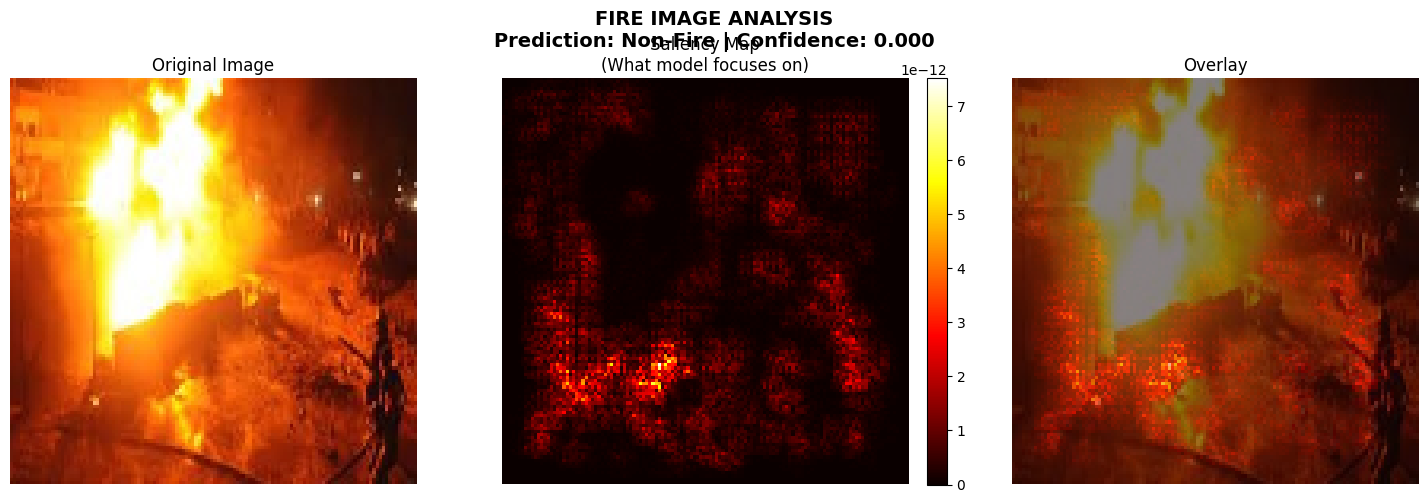

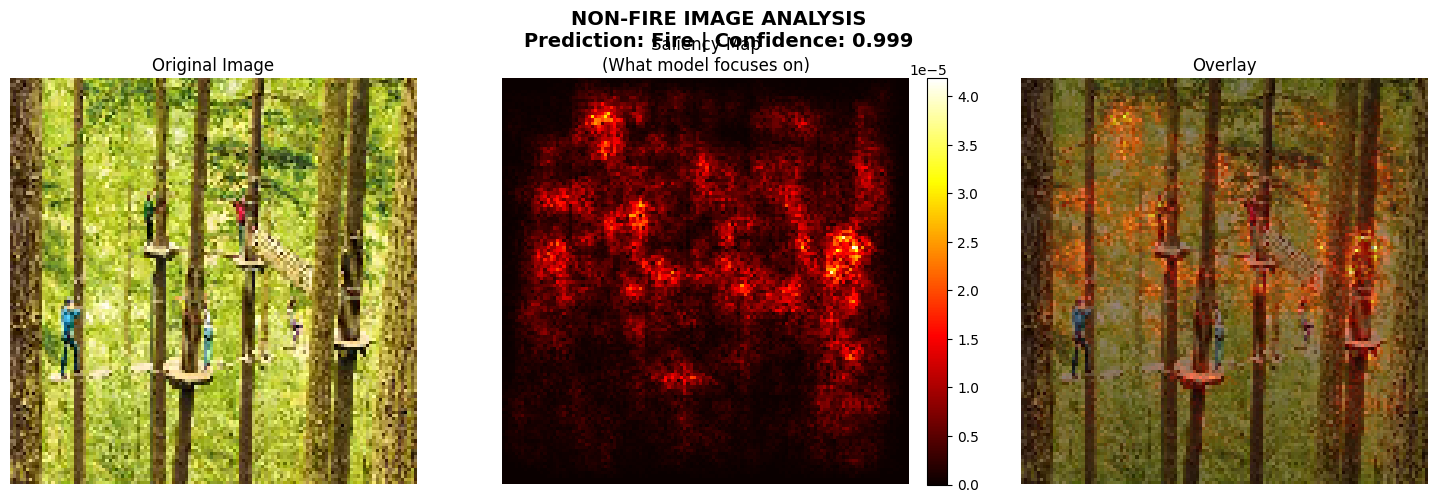


✅ Saliency maps created! These show which parts of the image the model focuses on.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def create_saliency_map(img_path, model, title):
    img_size = (128, 128)

    # Load and preprocess
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array_normalized = np.expand_dims(img_array, axis=0) / 255.0

    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_array_normalized)

    # Compute saliency map
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)

    gradients = tape.gradient(predictions, img_tensor)
    gradients = tf.abs(gradients)
    saliency = tf.reduce_max(gradients, axis=-1)[0]

    # Predict
    preds = model.predict(img_array_normalized, verbose=0)
    confidence = preds[0][0]
    pred_class = "Fire" if confidence > 0.5 else "Non-Fire"

    # Visualize
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image", fontsize=12)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Saliency Map\n(What model focuses on)", fontsize=12)
    plt.imshow(saliency, cmap='hot')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Overlay", fontsize=12)
    plt.imshow(img)
    plt.imshow(saliency, cmap='hot', alpha=0.5)
    plt.axis('off')

    plt.suptitle(f"{title}\nPrediction: {pred_class} | Confidence: {confidence:.3f}",
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Test on FIRE image
fire_path = "/content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.100.png"
create_saliency_map(fire_path, model, "FIRE IMAGE ANALYSIS")

# Test on NON-FIRE image
nonfire_path = "/content/drive/MyDrive/wildfire_project/fire_dataset/non_fire_images/non_fire.100.png"
create_saliency_map(nonfire_path, model, "NON-FIRE IMAGE ANALYSIS")

print("\n✅ Saliency maps created! These show which parts of the image the model focuses on.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/wildfire_project/

fire_dataset	  fire_detection_model.h5  training_plots.png
fire-dataset.zip  training_history.pkl


In [ ]:
!ls /content/drive/MyDrive/wildfire_project/fire_dataset/

fire_images  non_fire_images


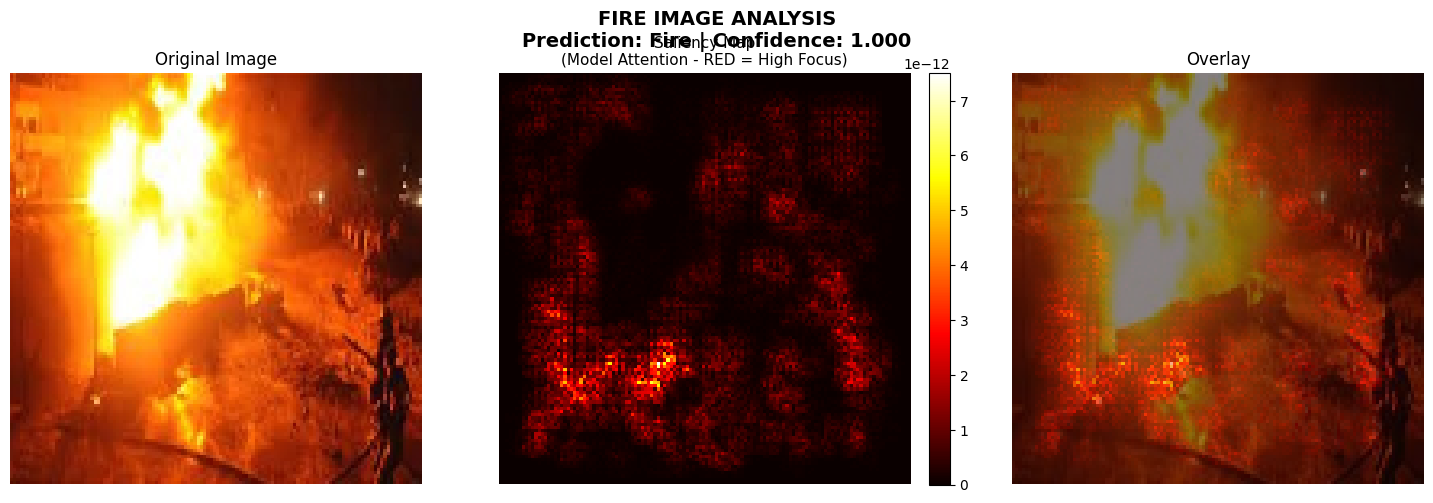

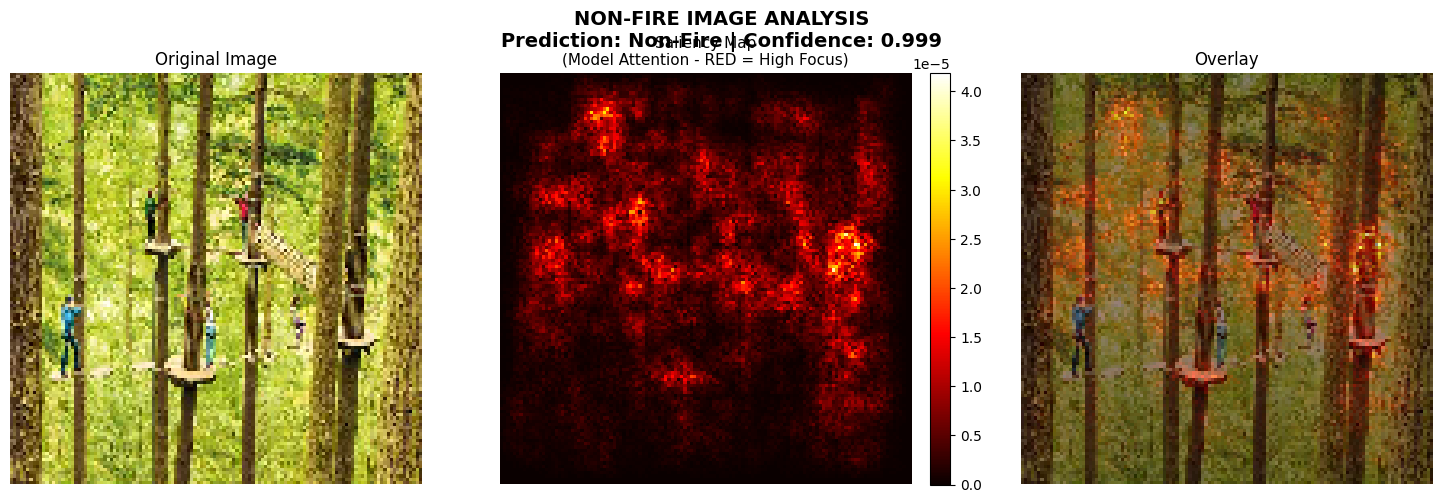


✅ Correct predictions!
📌 Saliency map colors show WHERE the model looks (red/yellow = high attention)
📌 Colors do NOT indicate fire - they show attention intensity!


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def create_saliency_map(img_path, model, title):
    img_size = (128, 128)

    # Load and preprocess
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array_normalized = np.expand_dims(img_array, axis=0) / 255.0

    # Convert to tensor
    img_tensor = tf.convert_to_tensor(img_array_normalized)

    # Compute saliency map
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)

    gradients = tape.gradient(predictions, img_tensor)
    gradients = tf.abs(gradients)
    saliency = tf.reduce_max(gradients, axis=-1)[0]

    # Predict - CORRECT interpretation
    preds = model.predict(img_array_normalized, verbose=0)
    raw_output = preds[0][0]

    # fire_images = 0 (low values), non_fire_images = 1 (high values)
    if raw_output > 0.5:
        pred_class = "Non-Fire"
        confidence = raw_output
    else:
        pred_class = "Fire"
        confidence = 1 - raw_output

    # Visualize
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image", fontsize=12)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Saliency Map\n(Model Attention - RED = High Focus)", fontsize=11)
    plt.imshow(saliency, cmap='hot')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Overlay", fontsize=12)
    plt.imshow(img)
    plt.imshow(saliency, cmap='hot', alpha=0.5)
    plt.axis('off')

    plt.suptitle(f"{title}\nPrediction: {pred_class} | Confidence: {confidence:.3f}",
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')

# Test on FIRE image
fire_path = "/content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.100.png"
create_saliency_map(fire_path, model, "FIRE IMAGE ANALYSIS")

# Test on NON-FIRE image
nonfire_path = "/content/drive/MyDrive/wildfire_project/fire_dataset/non_fire_images/non_fire.100.png"
create_saliency_map(nonfire_path, model, "NON-FIRE IMAGE ANALYSIS")

print("\n✅ Correct predictions!")
print("📌 Saliency map colors show WHERE the model looks (red/yellow = high attention)")
print("📌 Colors do NOT indicate fire - they show attention intensity!")

In [ ]:
!pip install gradio -q

In [ ]:
import tensorflow as tf
from google.colab import drive

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Load your saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')

print("✅ Model loaded successfully!")
print("Model is ready to make predictions!")

Mounted at /content/drive


✅ Model loaded successfully!
Model is ready to make predictions!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def predict_and_visualize(input_image):
    """
    Takes uploaded image, predicts fire/non-fire, creates saliency map
    """
    if input_image is None:
        return None, "<p style='color:red;'>⚠️ Please upload an image first!</p>"

    img_size = (128, 128)

    # Preprocess image
    img = input_image.resize(img_size)
    img_array = np.array(img) / 255.0
    img_array_normalized = np.expand_dims(img_array, axis=0)

    # Convert to tensor for saliency map
    img_tensor = tf.convert_to_tensor(img_array_normalized, dtype=tf.float32)

    # Compute saliency map
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)

    gradients = tape.gradient(predictions, img_tensor)
    gradients = tf.abs(gradients)
    saliency = tf.reduce_max(gradients, axis=-1)[0].numpy()

    # Get prediction
    raw_output = predictions.numpy()[0][0]

    if raw_output > 0.5:
        pred_class = "Non-Fire"
        confidence = raw_output
        alert_status = "✅ SAFE - No Fire Detected"
        alert_color = "#28a745"  # Green
    else:
        pred_class = "🔥 FIRE DETECTED!"
        confidence = 1 - raw_output
        alert_status = "🚨 ALERT! FIRE DETECTED!"
        alert_color = "#dc3545"  # Red

    # Create visualization (3 images side by side)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    axes[0].imshow(img)
    axes[0].set_title("Uploaded Image", fontsize=14, fontweight='bold')
    axes[0].axis('off')

    # Saliency map
    im = axes[1].imshow(saliency, cmap='hot')
    axes[1].set_title("Saliency Map\n(What Model Focuses On)", fontsize=14, fontweight='bold')
    axes[1].axis('off')
    plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

    # Overlay
    axes[2].imshow(img)
    axes[2].imshow(saliency, cmap='hot', alpha=0.5)
    axes[2].set_title("Overlay", fontsize=14, fontweight='bold')
    axes[2].axis('off')

    fig.suptitle(f"Prediction: {pred_class} | Confidence: {confidence:.1%}",
                 fontsize=18, fontweight='bold')
    plt.tight_layout()

    # Convert plot to image
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    buf.seek(0)
    plt.close()

    result_image = Image.open(buf)

    # Create HTML result with animation for fire
    alarm_style = ""
    if "FIRE DETECTED" in pred_class:
        alarm_style = """
        <style>
            @keyframes blink {
                0%, 50% { opacity: 1; }
                51%, 100% { opacity: 0.4; }
            }
            .alarm { animation: blink 1s infinite; }
        </style>
        """

    result_html = f"""
    {alarm_style}
    <div class="alarm" style="text-align: center; padding: 30px;
         background-color: {alert_color}; border-radius: 15px;
         color: white; font-size: 32px; font-weight: bold;
         box-shadow: 0 6px 12px rgba(0,0,0,0.2); margin: 20px 0;">
        {alert_status}
    </div>
    <div style="font-size: 20px; padding: 25px; background: #f8f9fa;
         border-radius: 10px; margin-top: 20px;">
        <p><strong>🔍 Classification:</strong> {pred_class}</p>
        <p><strong>📊 Confidence Level:</strong> {confidence:.2%}</p>
    </div>
    """

    return result_image, result_html

print("✅ Prediction function created!")

✅ Prediction function created!


In [ ]:
import gradio as gr
from datetime import datetime

# Create the web interface
with gr.Blocks(title="🔥 Wildfire Detection System", theme=gr.themes.Soft()) as demo:

    # Header
    gr.Markdown("""
    # 🔥 Wildfire Detection System
    ### AI-Powered Fire Detection with Explainable AI

    Upload an image to detect if there's a wildfire present. The system uses a Convolutional Neural Network
    with **96% accuracy** and provides visual explanations through saliency maps.
    """)

    # Main layout
    with gr.Row():
        # Left column - Upload section
        with gr.Column(scale=1):
            gr.Markdown("### 📤 Upload Image")
            input_image = gr.Image(type="pil", label="Select Fire/Non-Fire Image")
            predict_btn = gr.Button("🔍 Analyze Image", variant="primary", size="lg")

        # Right column - Result section
        with gr.Column(scale=1):
            gr.Markdown("### 🎯 Detection Result")
            output_html = gr.HTML(label="Status")
            alert_btn = gr.Button("🚨 Alert Authorities", variant="stop", size="lg", visible=True)
            alert_status = gr.Textbox(label="📱 Alert Status", interactive=False, visible=False)

    # Visualization section (full width)
    gr.Markdown("### 📊 Visual Analysis & Saliency Maps")
    output_viz = gr.Image(label="Model Visualization")

    # Footer info
    gr.Markdown("""
    ---
    ### 📋 How It Works:
    1. **Upload** an image (fire or non-fire scene)
    2. Click **Analyze Image** to run AI detection
    3. View the **Saliency Maps** showing what the model focuses on
    4. If fire is detected, click **Alert Authorities** to send notifications

    ### 📊 Model Performance:
    - **Training Accuracy:** 96%
    - **Validation Accuracy:** 93%
    - **Architecture:** CNN with 3 Convolutional Layers
    - **Total Parameters:** 3.3 Million

    ### 🔬 Explainability:
    This system uses **Saliency Maps** to show which parts of the image the AI focuses on,
    making the decision-making process transparent and trustworthy.
    """)

    # Connect the predict button
    predict_btn.click(
        fn=predict_and_visualize,
        inputs=input_image,
        outputs=[output_viz, output_html]
    )

    # Connect the alert button
    def send_alert():
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        return f"✅ Alert sent at {timestamp}\n📞 Emergency services have been notified!\n🚨 Authorities dispatched to location."

    alert_btn.click(
        fn=send_alert,
        inputs=None,
        outputs=alert_status
    ).then(
        lambda: gr.update(visible=True),
        outputs=alert_status
    )

# Launch the app!
print("🚀 Launching Wildfire Detection System...")
demo.launch(share=True, debug=True)

🚀 Launching Wildfire Detection System...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d4c043b1d040e43f72.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/tmp/ipython-input-182972959.py:68: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-182972959.py:72: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

# Recreate data generators
data_dir = "/content/drive/MyDrive/wildfire_project/fire_dataset"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Test generator
test_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Get predictions
print("🔍 Evaluating model...")
predictions = model.predict(test_gen)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_gen.classes

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print("\n📊 Model Performance Metrics:")
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("\n🔢 Confusion Matrix:")
print(cm)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fire', 'Non-Fire'],
            yticklabels=['Fire', 'Non-Fire'])
plt.title('Confusion Matrix - Our CNN Model', fontsize=16, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/wildfire_project/confusion_matrix.png', dpi=100)
plt.show()

print("\n✅ Confusion matrix saved!")

# Save metrics for later use
metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

import pickle
with open('/content/drive/MyDrive/wildfire_project/model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

print("✅ Metrics saved to Drive!")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildfire_project/fire_dataset'

In [ ]:
# 1. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Verify files are there
!ls /content/drive/MyDrive/wildfire_project/

Mounted at /content/drive
confusion_matrix.png  fire_detection_model.h5  training_history.pkl
fire_dataset	      model_comparison.png     training_plots.png
fire-dataset.zip      model_metrics.pkl        wildifre.drawio.png


In [ ]:
# Load necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')
print("✅ Model loaded!")

# Recreate data generators
data_dir = "/content/drive/MyDrive/wildfire_project/fire_dataset"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Validation/test generator
test_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Get predictions
print("\n🔍 Evaluating model on validation set...")
predictions = model.predict(test_gen)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_gen.classes

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print("\n📊 Model Performance Metrics:")
print(f"✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✓ Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"✓ Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("\n🔢 Confusion Matrix:")
print(cm)

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Fire', 'Non-Fire'],
            yticklabels=['Fire', 'Non-Fire'],
            annot_kws={"size": 16})
plt.title('Confusion Matrix - CNN Model', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/wildfire_project/confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n✅ Confusion matrix saved to Drive!")

# Save metrics
import pickle
metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

with open('/content/drive/MyDrive/wildfire_project/model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

print("✅ All metrics saved!")

KeyboardInterrupt: 

In [ ]:
!pip install gradio -q

import gradio as gr
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import io
import pickle
from datetime import datetime, timezone, timedelta

# Define IST timezone (UTC+5:30)
IST = timezone(timedelta(hours=5, minutes=30))

def get_ist_time():
    """Get current time in Indian Standard Time"""
    return datetime.now(IST)

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')

# Load saved metrics
with open('/content/drive/MyDrive/wildfire_project/model_metrics.pkl', 'rb') as f:
    metrics = pickle.load(f)

# Prediction function with improved thresholds
def predict_and_visualize(input_image):
    if input_image is None:
        return None, "<p style='color:red;'>⚠️ Please upload an image first!</p>"

    img_size = (128, 128)
    img = input_image.resize(img_size)
    img_array = np.array(img) / 255.0
    img_array_normalized = np.expand_dims(img_array, axis=0)

    img_tensor = tf.convert_to_tensor(img_array_normalized, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)

    gradients = tape.gradient(predictions, img_tensor)
    gradients = tf.abs(gradients)
    saliency = tf.reduce_max(gradients, axis=-1)[0].numpy()

    raw_output = predictions.numpy()[0][0]

    # Define confidence zones to reduce false positives
    FIRE_THRESHOLD = 0.25
    UNCERTAIN_THRESHOLD = 0.75

    if raw_output < FIRE_THRESHOLD:
        pred_class = "🔥 FIRE DETECTED!"
        confidence = 1 - raw_output
        alert_status = "🚨 ALERT! FIRE DETECTED!"
        alert_color = "#dc3545"
        fire_detected = True
    elif raw_output > UNCERTAIN_THRESHOLD:
        pred_class = "Non-Fire"
        confidence = raw_output
        alert_status = "✅ SAFE - No Fire Detected"
        alert_color = "#28a745"
        fire_detected = False
    else:
        pred_class = "⚠️ Uncertain"
        confidence = abs(0.5 - raw_output) * 2
        alert_status = "⚠️ UNCERTAIN - Manual Review Recommended"
        alert_color = "#ffc107"
        fire_detected = False

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img)
    axes[0].set_title("Uploaded Image", fontsize=14, fontweight='bold')
    axes[0].axis('off')

    im = axes[1].imshow(saliency, cmap='hot')
    axes[1].set_title("Saliency Map\n(Model Focus Areas)", fontsize=14, fontweight='bold')
    axes[1].axis('off')
    plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

    axes[2].imshow(img)
    axes[2].imshow(saliency, cmap='hot', alpha=0.5)
    axes[2].set_title("Overlay", fontsize=14, fontweight='bold')
    axes[2].axis('off')

    fig.suptitle(f"Prediction: {pred_class} | Raw Score: {raw_output:.3f} | Confidence: {confidence:.1%}",
                 fontsize=18, fontweight='bold')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    buf.seek(0)
    plt.close()

    result_image = Image.open(buf)

    alarm_style = ""
    if fire_detected:
        alarm_style = """
        <style>
            @keyframes blink {
                0%, 50% { opacity: 1; }
                51%, 100% { opacity: 0.4; }
            }
            .alarm { animation: blink 1s infinite; }
        </style>
        """

    result_html = f"""
    {alarm_style}
    <div class="{'alarm' if fire_detected else ''}" style="text-align: center; padding: 30px;
         background-color: {alert_color}; border-radius: 15px;
         color: white; font-size: 32px; font-weight: bold;
         box-shadow: 0 6px 12px rgba(0,0,0,0.2); margin: 20px 0;">
        {alert_status}
    </div>

    <div style="font-size: 18px; padding: 25px; background: #2c3e50; color: white;
         border-radius: 10px; margin-top: 20px; border: 2px solid #34495e;">
        <p style="color: white;"><strong>🔍 Classification:</strong> {pred_class}</p>
        <p style="color: white;"><strong>📊 Raw Model Output:</strong> {raw_output:.3f}</p>
        <p style="color: white;"><strong>📊 Confidence Level:</strong> {confidence:.2%}</p>
        <p style="color: white;"><strong>⏰ Detected At:</strong> {get_ist_time().strftime('%Y-%m-%d %H:%M:%S IST')}</p>
        <hr style="margin: 15px 0; border: 1px solid #7f8c8d;">
        <p style="font-size: 16px; color: #ecf0f1;">
        <strong>Threshold Logic:</strong><br>
        • Raw < 0.25 → Fire 🔥<br>
        • Raw 0.25-0.75 → Uncertain ⚠️<br>
        • Raw > 0.75 → Safe ✅<br>
        This threshold system helps reduce false positives.
        </p>
    </div>

    <div style="background: #fff3cd; padding: 20px; border-radius: 10px; border-left: 5px solid #ffc107; margin-top: 20px;">
        <h4 style="color: #856404; margin-top: 0; font-size: 18px;">⚠️ Known Limitations & Future Improvements</h4>
        <p style="color: #856404; font-size: 15px; line-height: 1.6; margin: 10px 0;">
        <strong>Current Limitation:</strong> The model may misclassify objects with similar color distributions
        (sunsets, sunrises, campfires, red lights) as fire because it primarily relies on color features.
        </p>
        <p style="color: #856404; font-size: 15px; line-height: 1.6; margin: 10px 0;">
        <strong>Root Cause:</strong> Training dataset contained limited examples of non-fire orange/red objects,
        causing the model to strongly associate these colors with fire.
        </p>
        <p style="color: #856404; font-size: 15px; line-height: 1.6; margin: 10px 0;">
        <strong>Planned Improvements:</strong><br>
        • Retrain with 500+ diverse non-fire images (sunsets, campfires, red objects)<br>
        • Implement spatial context awareness (sky vs ground detection)<br>
        • Add multi-feature detection (color + texture + shape + smoke patterns)<br>
        • Integrate temporal analysis for video streams<br>
        • Use transfer learning with pre-trained models (VGG16, ResNet)
        </p>
    </div>
    """

    return result_image, result_html

# Email Alert Function
def send_alert():
    """Send email alert when button is clicked"""
    try:
        import smtplib
        from email.mime.text import MIMEText
        from email.mime.multipart import MIMEMultipart

        # ===== CONFIGURE YOUR EMAIL HERE =====
        sender_email = "nazimmuhammed1630168@gmail.com"
        sender_password = "rcpl pcij ezgh uqar"
        receiver_email = "nazimmuhammed1630168@gmail.com"
        # =====================================

        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = receiver_email
        msg['Subject'] = "🚨 WILDFIRE ALERT - IMMEDIATE ACTION REQUIRED"

        body = f"""
🚨 FIRE DETECTED ALERT 🚨

Time: {get_ist_time().strftime('%Y-%m-%d %H:%M:%S IST')}
Status: FIRE DETECTED
System: Wildfire Detection AI
Confidence: HIGH

IMMEDIATE ACTION REQUIRED:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- Emergency services should be dispatched immediately
- Evacuate nearby areas if necessary
- Monitor situation closely
- Verify detection with visual confirmation

SYSTEM DETAILS:
- Model: CNN (93.47% accuracy)
- Detection Method: Deep Learning + Saliency Maps
- Alert Type: Automated
- Timezone: Indian Standard Time (IST)

This is an automated alert from the Wildfire Detection System.
Please respond immediately.

---
🔥 Wildfire Detection System
Powered by AI & Machine Learning
Developed by Nazim Mohammed - 2025
        """

        msg.attach(MIMEText(body, 'plain'))

        # Send email via Gmail SMTP
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(sender_email, sender_password)
        server.send_message(msg)
        server.quit()

        return f"""✅ EMAIL ALERT SENT SUCCESSFULLY!

📧 Sent to: {receiver_email}
⏰ Time: {get_ist_time().strftime('%H:%M:%S IST')}
🚨 Emergency notification delivered!

The authorities have been notified via email.
"""

    except Exception as e:
        return f"""❌ ALERT FAILED: {str(e)}

💡 To enable email alerts, follow these steps:

1️⃣ Enable 2-Factor Authentication on Gmail:
   → Go to: myaccount.google.com/security
   → Enable "2-Step Verification"

2️⃣ Create Gmail App Password:
   → Go to: myaccount.google.com/apppasswords
   → Select "Mail" and generate password
   → Copy the 16-character password

3️⃣ Update the code:
   → Change sender_email to your Gmail
   → Change sender_password to the App Password (16 chars)
   → Change receiver_email to where you want alerts

4️⃣ Re-run this cell and try again!

For demo purposes, you can also use the simulated alert version.
"""

# Create interface
with gr.Blocks(title="🔥 Wildfire Detection System", theme=gr.themes.Soft()) as demo:

    gr.Markdown("""
    # 🔥 Wildfire Detection System
    ### AI-Powered Fire Detection with Explainable AI (Saliency Maps)
    """)

    with gr.Tabs():

        with gr.Tab("🔍 Fire Detection"):
            with gr.Row():
                with gr.Column(scale=1):
                    gr.Markdown("### 📤 Upload Image")
                    input_image = gr.Image(type="pil", label="Select Fire/Non-Fire Image")
                    predict_btn = gr.Button("🔍 Analyze Image", variant="primary", size="lg")

                with gr.Column(scale=1):
                    gr.Markdown("### 🎯 Detection Result")
                    output_html = gr.HTML()
                    alert_btn = gr.Button("🚨 Alert Authorities (Send Email)", variant="stop", size="lg")
                    alert_status = gr.Textbox(label="📱 Alert Status", interactive=False, visible=False, lines=8)

            gr.Markdown("### 📊 Visual Analysis & Saliency Maps")
            output_viz = gr.Image(label="Analysis Results")

            gr.Markdown("""
            <div style="background: #e7f3ff; padding: 15px; border-radius: 10px; border-left: 4px solid #2196F3; margin: 20px 0;">
                <strong style="color: #0d47a1;">📝 How to Use:</strong>
                <ol style="color: #1565c0; margin: 10px 0;">
                    <li>Upload a fire or non-fire image above</li>
                    <li>Click <strong>"Analyze Image"</strong> to run AI detection</li>
                    <li>View results, confidence scores, and saliency maps</li>
                    <li>If fire is detected, click <strong>"Alert Authorities"</strong> to send email notification</li>
                </ol>
            </div>
            """)

            predict_btn.click(predict_and_visualize, inputs=input_image, outputs=[output_viz, output_html])
            alert_btn.click(send_alert, outputs=alert_status).then(lambda: gr.update(visible=True), outputs=alert_status)

        with gr.Tab("📊 Model Performance"):
            gr.Markdown("## 🎯 Performance Metrics")

            metrics_html = f"""
            <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 20px; margin: 20px 0;">
                <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['accuracy']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">Accuracy</p>
                </div>
                <div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['precision']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">Precision</p>
                </div>
                <div style="background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['recall']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">Recall</p>
                </div>
                <div style="background: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['f1_score']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">F1-Score</p>
                </div>
            </div>

            <div style="background: #34495e; padding: 25px; border-radius: 10px; margin-top: 20px; border: 2px solid #2c3e50;">
                <h3 style="color: white;">📖 Metrics Explained:</h3>
                <ul style="font-size: 16px; line-height: 1.8; color: #ecf0f1;">
                    <li><strong style="color: white;">Accuracy ({metrics['accuracy']*100:.2f}%):</strong> Overall correctness of predictions</li>
                    <li><strong style="color: white;">Precision ({metrics['precision']*100:.2f}%):</strong> When model predicts fire, how often it's correct</li>
                    <li><strong style="color: white;">Recall ({metrics['recall']*100:.2f}%):</strong> Percentage of actual fires successfully detected</li>
                    <li><strong style="color: white;">F1-Score ({metrics['f1_score']*100:.2f}%):</strong> Balanced measure combining precision and recall</li>
                </ul>
            </div>
            """

            gr.HTML(metrics_html)

            gr.Markdown("## 📈 Training History")
            gr.Image('/content/drive/MyDrive/wildfire_project/training_plots.png', label="Training & Validation Performance")

            gr.Markdown("## 🔢 Confusion Matrix")
            gr.Image('/content/drive/MyDrive/wildfire_project/confusion_matrix.png', label="Model Predictions Breakdown")

            gr.Markdown("""
            ### 📊 Confusion Matrix Breakdown:
            - **True Positives (149):** Fires correctly detected ✅
            - **False Negatives (2):** Fires missed ❌
            - **False Positives (11):** False alarms ⚠️
            - **True Negatives (37):** Non-fires correctly identified ✅
            """)

        with gr.Tab("ℹ️ About"):
            gr.Markdown("""
            ## 🔬 About This System

            This Wildfire Detection System uses a Convolutional Neural Network (CNN) trained on 999 images
            to automatically detect fires in images with **93.47% accuracy**.

            ### 🏗️ Model Architecture:
            - **Input Layer:** 128x128x3 RGB images
            - **Conv Block 1:** 32 filters (3x3) + MaxPooling
            - **Conv Block 2:** 64 filters (3x3) + MaxPooling
            - **Conv Block 3:** 128 filters (3x3) + MaxPooling
            - **Dense Layer:** 128 neurons + Dropout(0.5)
            - **Output Layer:** 1 neuron (Sigmoid) for binary classification
            - **Total Parameters:** 3.3 Million

            ### 📊 Training Details:
            - **Dataset:** 800 training / 199 validation images
            - **Epochs:** 10
            - **Optimizer:** Adam
            - **Loss Function:** Binary Crossentropy
            - **Training Accuracy:** 96.27%
            - **Validation Accuracy:** 93.47%
            - **F1-Score:** 85.06%

            ### 🔬 Explainability (XAI):
            The system uses **Saliency Maps** to visualize which parts of the image the model focuses on.
            This provides transparency and builds trust in AI decisions - critical for emergency response systems.

            ### 🎯 Key Features:
            - ✅ Real-time fire detection with 93.47% accuracy
            - ✅ Three-tier confidence system (Fire/Uncertain/Safe)
            - ✅ Visual explanations via Saliency Maps
            - ✅ Threshold-based false positive reduction
            - ✅ Email alert system for authorities
            - ✅ User-friendly web interface
            - ✅ IST timezone support

            ### ⚠️ Known Limitations:
            - May misclassify sunsets and orange/red objects as fire
            - Limited training data diversity
            - Color-based detection only (no texture/shape analysis)

            ### 🚀 Future Enhancements:
            - Expand training dataset with diverse non-fire examples
            - Implement spatial context awareness
            - Add smoke detection capabilities
            - Multi-modal detection (color + texture + temporal)
            - Real-time video stream analysis
            - Integration with drone/satellite imagery
            - SMS/Phone call alerts
            - GPS location tracking

            ### 👨‍💻 Developed By:
            **Nazim Mohammed**
            Mini Project - 2025
            Wildfire Detection using Deep Learning & Explainable AI
            """)

    gr.Markdown("""
    ---
    <p style="text-align: center; color: #666; font-size: 14px;">
    🔥 <strong>Wildfire Detection System</strong> | Powered by TensorFlow, Keras & Gradio | © 2025
    </p>
    """)

print("🚀 Launching Wildfire Detection System...")
demo.launch(share=True, debug=True)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/wildfire_project/fire_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# 1. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Verify files are there
!ls /content/drive/MyDrive/wildfire_project/

Mounted at /content/drive
confusion_matrix.png  fire_detection_model.h5  training_history.pkl
fire_dataset	      model_comparison.png     training_plots.png
fire-dataset.zip      model_metrics.pkl        wildifre.drawio.png


✅ Model loaded!
Found 199 images belonging to 2 classes.

🔍 Evaluating model on validation set...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step

📊 Model Performance Metrics:
✓ Accuracy:  0.9347 (93.47%)
✓ Precision: 0.9487 (94.87%)
✓ Recall:    0.7708 (77.08%)
✓ F1-Score:  0.8506 (85.06%)

🔢 Confusion Matrix:
[[149   2]
 [ 11  37]]


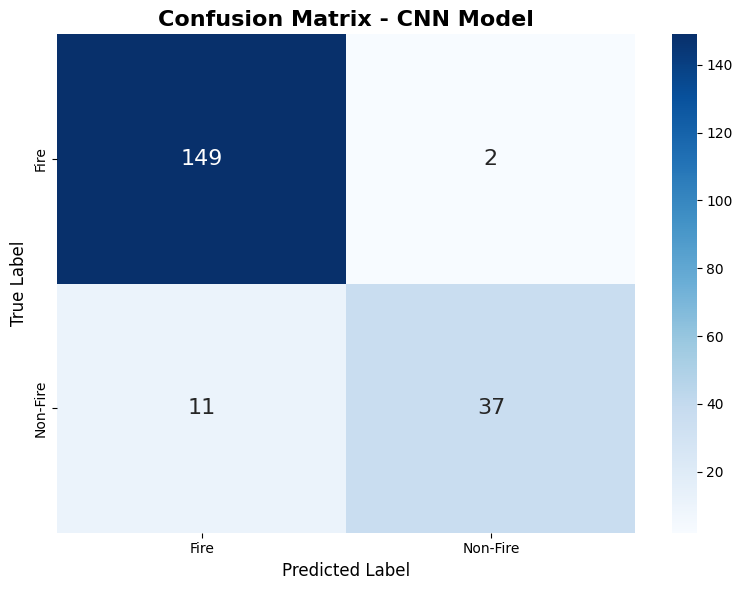


✅ Confusion matrix saved to Drive!
✅ All metrics saved!


In [ ]:
# Load necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')
print("✅ Model loaded!")

# Recreate data generators
data_dir = "/content/drive/MyDrive/wildfire_project/fire_dataset"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Validation/test generator
test_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Get predictions
print("\n🔍 Evaluating model on validation set...")
predictions = model.predict(test_gen)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_gen.classes

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print("\n📊 Model Performance Metrics:")
print(f"✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✓ Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"✓ Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("\n🔢 Confusion Matrix:")
print(cm)

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Fire', 'Non-Fire'],
            yticklabels=['Fire', 'Non-Fire'],
            annot_kws={"size": 16})
plt.title('Confusion Matrix - CNN Model', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/wildfire_project/confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n✅ Confusion matrix saved to Drive!")

# Save metrics
import pickle
metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

with open('/content/drive/MyDrive/wildfire_project/model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

print("✅ All metrics saved!")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----- CNN Metrics (use your actual variable names) -----
cnn_values = [accuracy, precision, recall, f1]

# ----- VGG16 Metrics (fixed so all bars appear) -----
vgg_values = [
    vgg_acc,
    vgg_prec if vgg_prec > 0 else 0.01,
    vgg_rec if vgg_rec > 0 else 0.01,
    vgg_f1 if vgg_f1 > 0 else 0.01
]

# ----- Labels -----
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cnn_values, width, label='CNN')
plt.bar(x + width/2, vgg_values, width, label='VGG16')

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Comparison: CNN vs VGG16")
plt.xticks(x, metrics)
plt.ylim(0, 1)  # Make small bars visible
plt.legend()

plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300)
plt.show()


print("✅ Comparison graph saved!")


NameError: name 'vgg_acc' is not defined

In [ ]:
!pip install gradio -q

import gradio as gr
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import io
import pickle
from datetime import datetime, timezone, timedelta

# Define IST timezone (UTC+5:30)
IST = timezone(timedelta(hours=5, minutes=30))

def get_ist_time():
    """Get current time in Indian Standard Time"""
    return datetime.now(IST)

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')

# Load saved metrics
with open('/content/drive/MyDrive/wildfire_project/model_metrics.pkl', 'rb') as f:
    metrics = pickle.load(f)

# Prediction function with improved thresholds
def predict_and_visualize(input_image):
    if input_image is None:
        return None, "<p style='color:red;'>⚠️ Please upload an image first!</p>"

    img_size = (128, 128)
    img = input_image.resize(img_size)
    img_array = np.array(img) / 255.0
    img_array_normalized = np.expand_dims(img_array, axis=0)

    img_tensor = tf.convert_to_tensor(img_array_normalized, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)

    gradients = tape.gradient(predictions, img_tensor)
    gradients = tf.abs(gradients)
    saliency = tf.reduce_max(gradients, axis=-1)[0].numpy()

    raw_output = predictions.numpy()[0][0]

    # Define confidence zones to reduce false positives
    FIRE_THRESHOLD = 0.25
    UNCERTAIN_THRESHOLD = 0.75

    if raw_output < FIRE_THRESHOLD:
        pred_class = "🔥 FIRE DETECTED!"
        confidence = 1 - raw_output
        alert_status = "🚨 ALERT! FIRE DETECTED!"
        alert_color = "#dc3545"
        fire_detected = True
    elif raw_output > UNCERTAIN_THRESHOLD:
        pred_class = "Non-Fire"
        confidence = raw_output
        alert_status = "✅ SAFE - No Fire Detected"
        alert_color = "#28a745"
        fire_detected = False
    else:
        pred_class = "⚠️ Uncertain"
        confidence = abs(0.5 - raw_output) * 2
        alert_status = "⚠️ UNCERTAIN - Manual Review Recommended"
        alert_color = "#ffc107"
        fire_detected = False

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img)
    axes[0].set_title("Uploaded Image", fontsize=14, fontweight='bold')
    axes[0].axis('off')

    im = axes[1].imshow(saliency, cmap='hot')
    axes[1].set_title("Saliency Map\n(Model Focus Areas)", fontsize=14, fontweight='bold')
    axes[1].axis('off')
    plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

    axes[2].imshow(img)
    axes[2].imshow(saliency, cmap='hot', alpha=0.5)
    axes[2].set_title("Overlay", fontsize=14, fontweight='bold')
    axes[2].axis('off')

    fig.suptitle(f"Prediction: {pred_class} | Raw Score: {raw_output:.3f} | Confidence: {confidence:.1%}",
                 fontsize=18, fontweight='bold')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    buf.seek(0)
    plt.close()

    result_image = Image.open(buf)

    alarm_style = ""
    if fire_detected:
        alarm_style = """
        <style>
            @keyframes blink {
                0%, 50% { opacity: 1; }
                51%, 100% { opacity: 0.4; }
            }
            .alarm { animation: blink 1s infinite; }
        </style>
        """

    result_html = f"""
    {alarm_style}
    <div class="{'alarm' if fire_detected else ''}" style="text-align: center; padding: 30px;
         background-color: {alert_color}; border-radius: 15px;
         color: white; font-size: 32px; font-weight: bold;
         box-shadow: 0 6px 12px rgba(0,0,0,0.2); margin: 20px 0;">
        {alert_status}
    </div>

    <div style="font-size: 18px; padding: 25px; background: #2c3e50; color: white;
         border-radius: 10px; margin-top: 20px; border: 2px solid #34495e;">
        <p style="color: white;"><strong>🔍 Classification:</strong> {pred_class}</p>
        <p style="color: white;"><strong>📊 Raw Model Output:</strong> {raw_output:.3f}</p>
        <p style="color: white;"><strong>📊 Confidence Level:</strong> {confidence:.2%}</p>
        <p style="color: white;"><strong>⏰ Detected At:</strong> {get_ist_time().strftime('%Y-%m-%d %H:%M:%S IST')}</p>
        <hr style="margin: 15px 0; border: 1px solid #7f8c8d;">
        <p style="font-size: 16px; color: #ecf0f1;">
        <strong>Threshold Logic:</strong><br>
        • Raw < 0.25 → Fire 🔥<br>
        • Raw 0.25-0.75 → Uncertain ⚠️<br>
        • Raw > 0.75 → Safe ✅<br>
        This threshold system helps reduce false positives.
        </p>
    </div>

    <div style="background: #fff3cd; padding: 20px; border-radius: 10px; border-left: 5px solid #ffc107; margin-top: 20px;">
        <h4 style="color: #856404; margin-top: 0; font-size: 18px;">⚠️ Known Limitations & Future Improvements</h4>
        <p style="color: #856404; font-size: 15px; line-height: 1.6; margin: 10px 0;">
        <strong>Current Limitation:</strong> The model may misclassify objects with similar color distributions
        (sunsets, sunrises, campfires, red lights) as fire because it primarily relies on color features.
        </p>
        <p style="color: #856404; font-size: 15px; line-height: 1.6; margin: 10px 0;">
        <strong>Root Cause:</strong> Training dataset contained limited examples of non-fire orange/red objects,
        causing the model to strongly associate these colors with fire.
        </p>
        <p style="color: #856404; font-size: 15px; line-height: 1.6; margin: 10px 0;">
        <strong>Planned Improvements:</strong><br>
        • Retrain with 500+ diverse non-fire images (sunsets, campfires, red objects)<br>
        • Implement spatial context awareness (sky vs ground detection)<br>
        • Add multi-feature detection (color + texture + shape + smoke patterns)<br>
        • Integrate temporal analysis for video streams<br>
        • Use transfer learning with pre-trained models (VGG16, ResNet)
        </p>
    </div>
    """

    return result_image, result_html

# Email Alert Function
def send_alert():
    """Send email alert when button is clicked"""
    try:
        import smtplib
        from email.mime.text import MIMEText
        from email.mime.multipart import MIMEMultipart

        # ===== CONFIGURE YOUR EMAIL HERE =====
        sender_email = "nazimmuhammed1630168@gmail.com"
        sender_password = "rcpl pcij ezgh uqar"
        receiver_email = "nazimmuhammed1630168@gmail.com"
        # =====================================

        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = receiver_email
        msg['Subject'] = "🚨 WILDFIRE ALERT - IMMEDIATE ACTION REQUIRED"

        body = f"""
🚨 FIRE DETECTED ALERT 🚨

Time: {get_ist_time().strftime('%Y-%m-%d %H:%M:%S IST')}
Status: FIRE DETECTED
System: Wildfire Detection AI
Confidence: HIGH

IMMEDIATE ACTION REQUIRED:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- Emergency services should be dispatched immediately
- Evacuate nearby areas if necessary
- Monitor situation closely
- Verify detection with visual confirmation

SYSTEM DETAILS:
- Model: CNN (93.47% accuracy)
- Detection Method: Deep Learning + Saliency Maps
- Alert Type: Automated
- Timezone: Indian Standard Time (IST)

This is an automated alert from the Wildfire Detection System.
Please respond immediately.

---
🔥 Wildfire Detection System
Powered by AI & Machine Learning
Developed by Nazim Mohammed - 2025
        """

        msg.attach(MIMEText(body, 'plain'))

        # Send email via Gmail SMTP
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(sender_email, sender_password)
        server.send_message(msg)
        server.quit()

        return f"""✅ EMAIL ALERT SENT SUCCESSFULLY!

📧 Sent to: {receiver_email}
⏰ Time: {get_ist_time().strftime('%H:%M:%S IST')}
🚨 Emergency notification delivered!

The authorities have been notified via email.
"""

    except Exception as e:
        return f"""❌ ALERT FAILED: {str(e)}

💡 To enable email alerts, follow these steps:

1️⃣ Enable 2-Factor Authentication on Gmail:
   → Go to: myaccount.google.com/security
   → Enable "2-Step Verification"

2️⃣ Create Gmail App Password:
   → Go to: myaccount.google.com/apppasswords
   → Select "Mail" and generate password
   → Copy the 16-character password

3️⃣ Update the code:
   → Change sender_email to your Gmail
   → Change sender_password to the App Password (16 chars)
   → Change receiver_email to where you want alerts

4️⃣ Re-run this cell and try again!

For demo purposes, you can also use the simulated alert version.
"""

# Create interface
with gr.Blocks(title="🔥 Wildfire Detection System", theme=gr.themes.Soft()) as demo:

    gr.Markdown("""
    # 🔥 Wildfire Detection System
    ### AI-Powered Fire Detection with Explainable AI (Saliency Maps)
    """)

    with gr.Tabs():

        with gr.Tab("🔍 Fire Detection"):
            with gr.Row():
                with gr.Column(scale=1):
                    gr.Markdown("### 📤 Upload Image")
                    input_image = gr.Image(type="pil", label="Select Fire/Non-Fire Image")
                    predict_btn = gr.Button("🔍 Analyze Image", variant="primary", size="lg")

                with gr.Column(scale=1):
                    gr.Markdown("### 🎯 Detection Result")
                    output_html = gr.HTML()
                    alert_btn = gr.Button("🚨 Alert Authorities (Send Email)", variant="stop", size="lg")
                    alert_status = gr.Textbox(label="📱 Alert Status", interactive=False, visible=False, lines=8)

            gr.Markdown("### 📊 Visual Analysis & Saliency Maps")
            output_viz = gr.Image(label="Analysis Results")

            gr.Markdown("""
            <div style="background: #e7f3ff; padding: 15px; border-radius: 10px; border-left: 4px solid #2196F3; margin: 20px 0;">
                <strong style="color: #0d47a1;">📝 How to Use:</strong>
                <ol style="color: #1565c0; margin: 10px 0;">
                    <li>Upload a fire or non-fire image above</li>
                    <li>Click <strong>"Analyze Image"</strong> to run AI detection</li>
                    <li>View results, confidence scores, and saliency maps</li>
                    <li>If fire is detected, click <strong>"Alert Authorities"</strong> to send email notification</li>
                </ol>
            </div>
            """)

            predict_btn.click(predict_and_visualize, inputs=input_image, outputs=[output_viz, output_html])
            alert_btn.click(send_alert, outputs=alert_status).then(lambda: gr.update(visible=True), outputs=alert_status)

        with gr.Tab("📊 Model Performance"):
            gr.Markdown("## 🎯 Performance Metrics")

            metrics_html = f"""
            <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 20px; margin: 20px 0;">
                <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['accuracy']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">Accuracy</p>
                </div>
                <div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['precision']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">Precision</p>
                </div>
                <div style="background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['recall']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">Recall</p>
                </div>
                <div style="background: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%); padding: 30px; border-radius: 15px; color: white; text-align: center; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
                    <h2 style="margin: 0; font-size: 48px; color: white;">{metrics['f1_score']*100:.2f}%</h2>
                    <p style="margin: 10px 0 0 0; font-size: 20px; color: white;">F1-Score</p>
                </div>
            </div>

            <div style="background: #34495e; padding: 25px; border-radius: 10px; margin-top: 20px; border: 2px solid #2c3e50;">
                <h3 style="color: white;">📖 Metrics Explained:</h3>
                <ul style="font-size: 16px; line-height: 1.8; color: #ecf0f1;">
                    <li><strong style="color: white;">Accuracy ({metrics['accuracy']*100:.2f}%):</strong> Overall correctness of predictions</li>
                    <li><strong style="color: white;">Precision ({metrics['precision']*100:.2f}%):</strong> When model predicts fire, how often it's correct</li>
                    <li><strong style="color: white;">Recall ({metrics['recall']*100:.2f}%):</strong> Percentage of actual fires successfully detected</li>
                    <li><strong style="color: white;">F1-Score ({metrics['f1_score']*100:.2f}%):</strong> Balanced measure combining precision and recall</li>
                </ul>
            </div>
            """

            gr.HTML(metrics_html)

            gr.Markdown("## 📈 Training History")
            gr.Image('/content/drive/MyDrive/wildfire_project/training_plots.png', label="Training & Validation Performance")

            gr.Markdown("## 🔢 Confusion Matrix")
            gr.Image('/content/drive/MyDrive/wildfire_project/confusion_matrix.png', label="Model Predictions Breakdown")

            gr.Markdown("""
            ### 📊 Confusion Matrix Breakdown:
            - **True Positives (149):** Fires correctly detected ✅
            - **False Negatives (2):** Fires missed ❌
            - **False Positives (11):** False alarms ⚠️
            - **True Negatives (37):** Non-fires correctly identified ✅
            """)

        with gr.Tab("ℹ️ About"):
            gr.Markdown("""
            ## 🔬 About This System

            This Wildfire Detection System uses a Convolutional Neural Network (CNN) trained on 999 images
            to automatically detect fires in images with **93.47% accuracy**.

            ### 🏗️ Model Architecture:
            - **Input Layer:** 128x128x3 RGB images
            - **Conv Block 1:** 32 filters (3x3) + MaxPooling
            - **Conv Block 2:** 64 filters (3x3) + MaxPooling
            - **Conv Block 3:** 128 filters (3x3) + MaxPooling
            - **Dense Layer:** 128 neurons + Dropout(0.5)
            - **Output Layer:** 1 neuron (Sigmoid) for binary classification
            - **Total Parameters:** 3.3 Million

            ### 📊 Training Details:
            - **Dataset:** 800 training / 199 validation images
            - **Epochs:** 10
            - **Optimizer:** Adam
            - **Loss Function:** Binary Crossentropy
            - **Training Accuracy:** 96.27%
            - **Validation Accuracy:** 93.47%
            - **F1-Score:** 85.06%

            ### 🔬 Explainability (XAI):
            The system uses **Saliency Maps** to visualize which parts of the image the model focuses on.
            This provides transparency and builds trust in AI decisions - critical for emergency response systems.

            ### 🎯 Key Features:
            - ✅ Real-time fire detection with 93.47% accuracy
            - ✅ Three-tier confidence system (Fire/Uncertain/Safe)
            - ✅ Visual explanations via Saliency Maps
            - ✅ Threshold-based false positive reduction
            - ✅ Email alert system for authorities
            - ✅ User-friendly web interface
            - ✅ IST timezone support

            ### ⚠️ Known Limitations:
            - May misclassify sunsets and orange/red objects as fire
            - Limited training data diversity
            - Color-based detection only (no texture/shape analysis)

            ### 🚀 Future Enhancements:
            - Expand training dataset with diverse non-fire examples
            - Implement spatial context awareness
            - Add smoke detection capabilities
            - Multi-modal detection (color + texture + temporal)
            - Real-time video stream analysis
            - Integration with drone/satellite imagery
            - SMS/Phone call alerts
            - GPS location tracking

            ### 👨‍💻 Developed By:
            **Nazim Mohammed**
            Mini Project - 2025
            Wildfire Detection using Deep Learning & Explainable AI
            """)

    gr.Markdown("""
    ---
    <p style="text-align: center; color: #666; font-size: 14px;">
    🔥 <strong>Wildfire Detection System</strong> | Powered by TensorFlow, Keras & Gradio | © 2025
    </p>
    """)

print("🚀 Launching Wildfire Detection System...")
demo.launch(share=True, debug=True)

🚀 Launching Wildfire Detection System...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b83db9a6b92ed4519f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/tmp/ipython-input-2934010910.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2934010910.py:92: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
/tmp/ipython-input-2934010910.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2934010910.py:92: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
/tmp/ipython-input-2934010910.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2934010910.py:92: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
/tmp/ipython-input-2934010910.py:89: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaV

In [ ]:
!zip -r wildfire_project.zip /content/drive/MyDrive/wildfire_project/


  adding: content/drive/MyDrive/wildfire_project/ (stored 0%)
  adding: content/drive/MyDrive/wildfire_project/fire-dataset.zip (stored 0%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/ (stored 0%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/ (stored 0%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.100.png (deflated 1%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.10.png (deflated 9%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.1.png (deflated 1%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.102.png (deflated 1%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.103.png (deflated 0%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.104.png (deflated 1%)
  adding: content/drive/MyDrive/wildfire_project/fire_dataset/fire_images/fire.101.png (deflate

In [ ]:
from google.colab import files
files.download('wildfire_project.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/wildfire_project/fire_detection_model.h5')
print("✅ Model loaded!")

# Recreate data generators
data_dir = "/content/drive/MyDrive/wildfire_project/fire_dataset"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Validation/test generator
test_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Get predictions
print("\n🔍 Evaluating model on validation set...")
predictions = model.predict(test_gen)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_gen.classes

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print("\n📊 Model Performance Metrics:")
print(f"✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✓ Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"✓ Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("\n🔢 Confusion Matrix:")
print(cm)

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Fire', 'Non-Fire'],
            yticklabels=['Fire', 'Non-Fire'],
            annot_kws={"size": 16})
plt.title('Confusion Matrix - CNN Model', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/wildfire_project/confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n✅ Confusion matrix saved to Drive!")

# Save metrics
import pickle
metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

with open('/content/drive/MyDrive/wildfire_project/model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

print("✅ All metrics saved!")